Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Moving to Directory with Data

In [2]:
cd /content/drive/My Drive/Data/Suspended

/content/drive/My Drive/Data/Suspended


Support Vector Regression

Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [19]:
dataset = pd.read_csv('Data1.csv')
X = dataset.iloc[:,0:1].values
y = dataset.iloc[:,1:2].values
#print(dataset)

Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

#X_train = X_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Fitting SVR to the dataset

In [22]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C=1000, gamma= 1 , epsilon=0.1, coef0=1)
#rbf = Gaussian Radial Basis Function Kernel
regressor.fit(X, y.ravel())

SVR(C=1000, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [100,1000], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(regressor,param_grid,verbose=3)
grid.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.867, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.859, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.934, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.887, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.633, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.880, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1000, cache_size=200, coef0=1, degree=3,
                           epsilon=0.1, gamma=1, kernel='rbf', max_iter=-1,
                           shrinking=True, tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000], 'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [24]:
grid.best_params_

{'C': 1000, 'gamma': 0.1}

In [25]:
#grid.best_estimator_

In [26]:
grid_predictions = grid.predict(X_test)
print(grid_predictions)

[-0.4803976  -1.23288015 -0.33652126  0.90832866  0.76027018 -0.16987142
 -0.34954964  0.65967265 -1.28299663]


Prediction on the training set

In [27]:
X_train = X_train.reshape((len(X_train), 1))
y_train_pred = grid.predict(X_train)
y_train_pred = sc_y.inverse_transform(y_train_pred)

Predicting a new result

In [28]:
y_pred = grid.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
#Now the prediction gives us the scaled value of y
#Thus we need inverse transformation of the scaled value for the real results

Evaluating Model

Training set Error 



In [29]:
MSE = np.mean(np.square(y_train_pred-y_train))
print('MSE is: ')
print(MSE)

print('RMSE is:')
print(np.sqrt(MSE))

MAE = np.mean(np.absolute(y_train_pred - y_train))
print('Mean absolute error on train set is: ')
print(MAE)

#R2 = regressor.score(X_train,y_train)
#print('R2 score is:')
#print(R2)

MSE is: 
34352.72686493061
RMSE is:
185.34488626593023
Mean absolute error on train set is: 
157.0493283387166


Test set Error 



In [30]:
MSE = np.mean(np.square(y_pred-y_test))
print('MSE is:')
print(MSE)

print('RMSE is:')
print(np.sqrt(MSE))

MAE = np.mean(np.absolute(y_pred - y_test))
print('Mean absolute error on test set is: ')
print(MAE)

#R2 = regressor.score(X_test,y_test)
#print('R2 score is:')
#print(R2)

MSE is:
24824.519602322438
RMSE is:
157.55798806256203
Mean absolute error on test set is: 
133.80787932070703


Visualising the SVR results

Training set

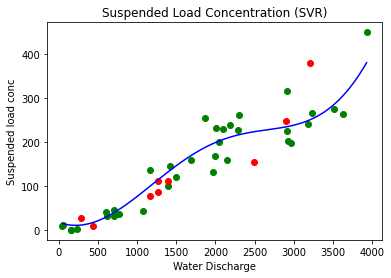

In [31]:
X_train1 = np.arange(min(X_train), max(X_train), 0.01)
X_train1 = X_train1.reshape((len(X_train1), 1))
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'green')
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test), color = 'red')
y_train_predictions = grid.predict(X_train1)
y_train_predictions1 = sc_y.inverse_transform(y_train_predictions)
plt.plot(sc_X.inverse_transform(X_train1), y_train_predictions1 , color = 'blue')
plt.title('Suspended Load Concentration (SVR)')
plt.xlabel('Water Discharge')
plt.ylabel('Suspended load conc')
plt.show()

Visualising the SVR results (for higher resolution and smoother curve) - Whole dataset

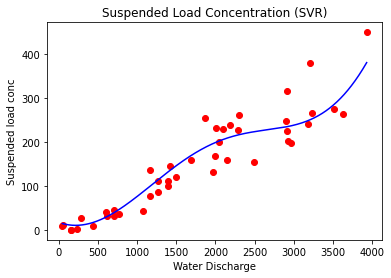

In [32]:
X = sc_X.inverse_transform(X)
y = sc_y.inverse_transform(y)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
y_grid = grid.predict(sc_X.transform(X_grid))
y_grid1 = sc_y.inverse_transform(y_grid)
plt.plot(X_grid, y_grid1, color = 'blue')
plt.title('Suspended Load Concentration (SVR)')
plt.xlabel('Water Discharge')
plt.ylabel('Suspended load conc')
plt.show()

Comparing predicted value on test set with actual values

<Figure size 640x480 with 0 Axes>

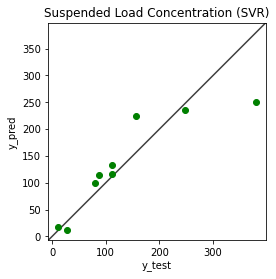

In [33]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
y_test = sc_y.inverse_transform(y_test)
ax.scatter(y_test, y_pred, color = 'green')
xpoints = ypoints = plt.xlim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.title('Suspended Load Concentration (SVR)')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()